In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df= pd.read_csv("census_income_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


We check for null values and there are none, which is a good sign, this means our DataFrame is clean. However after closer inspection we come to realize there are some values filled with `?`

In [5]:
df.isna().sum()

Unnamed: 0        0
AGE               0
WORKCLASS         0
FNLWGT            0
EDUCATION         0
EDUCATION-NUM     0
MARITAL STATUS    0
OCCUPATION        0
RELATIONSHIP      0
RACE              0
SEX               0
CAPITAL-GAIN      0
CAPITAL-LOSS      0
HOURS-PER-WEEK    0
NATIVE-COUNTRY    0
SALARY            0
dtype: int64

We take a closer look at the type of the element, for instance we take row `4` and column `WORKCLASS`

In [6]:
type(df.loc[4,"AGE"])

numpy.int64

In [7]:
type(df.loc[4,"SALARY"])

str

We can easily iterate over the values in this column and filter out the `?` string elements by matching them to the character with the same order number

Text(0, 0.5, 'Frequency')

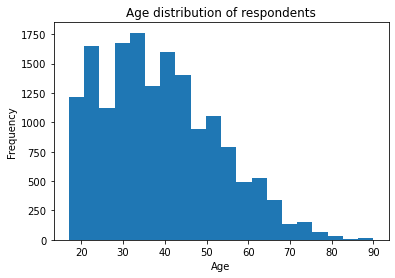

In [8]:
import numpy as np
import matplotlib.pyplot as plt

df["AGE"].plot.hist(bins=20)

plt.title("Age distribution of respondents")
plt.xlabel("Age")
plt.ylabel("Frequency")

Replacing the SALARY variable for a bool

In [9]:
df['SALARY'] = df['SALARY'].replace([' <=50K'], 0)
df

,Unnamed: 0,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16277,16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,0
16278,16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [10]:
df['SALARY'] = df['SALARY'].replace([' >50K'], 1)

In [11]:
df

,Unnamed: 0,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16277,16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,0
16278,16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


Creating the pearson function and comparing it with the built-in functions pearsonr and spearmanr

In [12]:
from scipy.stats import pearsonr, spearmanr

In [13]:
def pearson (x,y):
    x=x-np.mean(x)
    y=y-np.mean(y)
    return np.dot(x,y) / (np.sqrt(np.sum(x**2))* np.sqrt(np.sum(y**2)))
    

In [14]:
pearson (df['SALARY'], df["EDUCATION-NUM"])

0.3274820461800686

In [15]:
corr, p_value =pearsonr(df['SALARY'], df["EDUCATION-NUM"])
corr

0.3274820461800686

In [16]:
corr, p_value =spearmanr(df['SALARY'], df["EDUCATION-NUM"])
corr

0.3240455015053367

Text(0.5, 1.0, 'Relationship status proportion')

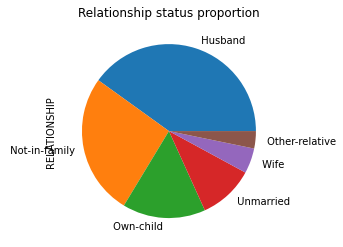

In [17]:
df["RELATIONSHIP"].value_counts().plot(kind='pie')
plt.title("Relationship status proportion")


In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

df.head(3)   

,Unnamed: 0,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1


In [19]:
clean_df=df.groupby("SALARY")

clean_df.first()

,Unnamed: 0,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY
SALARY,,,,,,,,,,,,,,,
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States


In [20]:
low_salary=clean_df.get_group(0)

In [21]:
high_salary=clean_df.get_group(1)

(array([  31.,   77.,  165.,  287.,  228.,  431.,  605.,  209., 4455.,
        2911.,  518.,  386., 1578.,  434.,   64.,   56.]),
 array([ 1.    ,  1.9375,  2.875 ,  3.8125,  4.75  ,  5.6875,  6.625 ,
         7.5625,  8.5   ,  9.4375, 10.375 , 11.3125, 12.25  , 13.1875,
        14.125 , 15.0625, 16.    ]),
 <BarContainer object of 16 artists>)

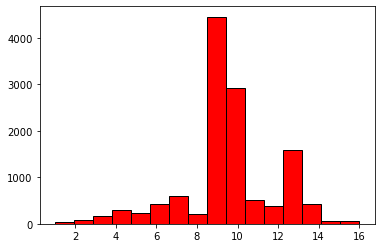

In [22]:
plt.hist(low_salary['EDUCATION-NUM'], color = 'red', edgecolor = 'black',
         bins = int(16))

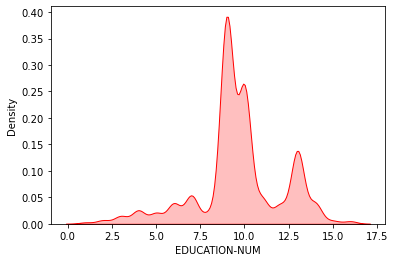

In [23]:
sns.kdeplot(low_salary['EDUCATION-NUM'], shade=True, color="red")
plt.show()

(array([1.000e+00, 2.000e+00, 1.100e+01, 2.200e+01, 1.400e+01, 2.500e+01,
        3.200e+01, 1.500e+01, 8.280e+02, 6.760e+02, 1.610e+02, 1.480e+02,
        1.092e+03, 5.000e+02, 1.940e+02, 1.250e+02]),
 array([ 1.    ,  1.9375,  2.875 ,  3.8125,  4.75  ,  5.6875,  6.625 ,
         7.5625,  8.5   ,  9.4375, 10.375 , 11.3125, 12.25  , 13.1875,
        14.125 , 15.0625, 16.    ]),
 <BarContainer object of 16 artists>)

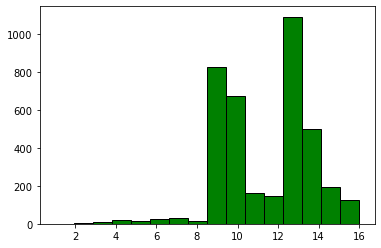

In [24]:
plt.hist(high_salary['EDUCATION-NUM'], color = 'green', edgecolor = 'black',bins = int(16))

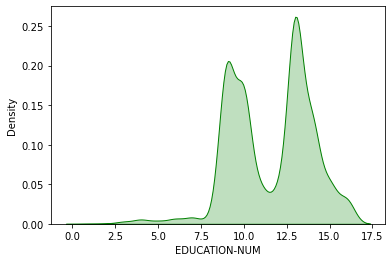

In [25]:
sns.kdeplot(high_salary['EDUCATION-NUM'], shade=True, color="green")
plt.show()

C:\Users\pizza\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pizza\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


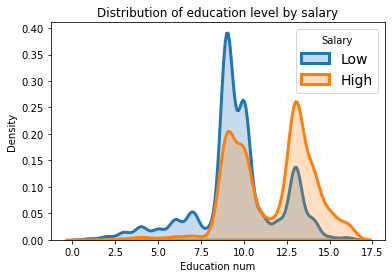

In [26]:
#subset = flights[flights['name'] == airline]

sns.distplot(low_salary['EDUCATION-NUM'], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label="Low")
sns.distplot(high_salary['EDUCATION-NUM'], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label="High")
plt.legend(prop={'size': 14}, title = 'Salary')
plt.title('Distribution of education level by salary'); 
plt.xlabel('Education num'); plt.ylabel('Density');

Text(0.5, 1.05, 'Education grouped by salary')

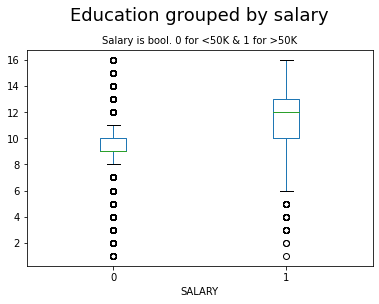

In [28]:
df.boxplot(by ='SALARY', column =['EDUCATION-NUM'], grid = False)
plt.title("Salary is bool. 0 for <50K & 1 for >50K", loc="center", fontsize=10)
title_string="Education grouped by salary"
plt.suptitle(title_string, y=1.05, fontsize=18)


Text(0.5, 1.05, 'Education grouped by gender')

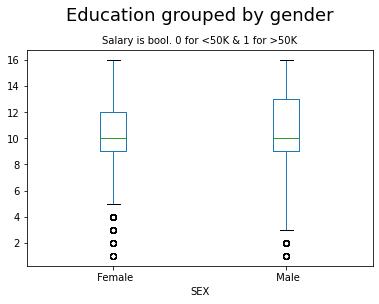

In [32]:
df.boxplot(by ='SEX', column =['EDUCATION-NUM'], grid = False)
plt.title("Salary is bool. 0 for <50K & 1 for >50K", loc="center", fontsize=10)
title_string="Education grouped by gender"
plt.suptitle(title_string, y=1.05, fontsize=18)

,Unnamed: 0,AGE,FNLWGT,EDUCATION-NUM,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,SALARY
SEX,,,,,,,,
Female,8152.685851,37.066593,185023.960155,10.060505,605.196458,62.047408,36.381479,0.108836
Male,8133.667587,39.616483,191637.880479,10.079098,1319.864365,100.803775,42.394291,0.299816


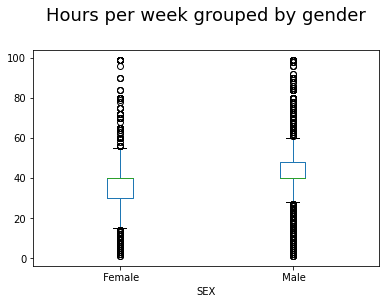

In [34]:
df.boxplot(by ='SEX', column =['HOURS-PER-WEEK'], grid = False)
plt.title("", loc="center", fontsize=10)
title_string="Hours per week grouped by gender"
plt.suptitle(title_string, y=1.05, fontsize=18)
df.groupby(["SEX"]).mean()

,Unnamed: 0,AGE,FNLWGT,EDUCATION-NUM,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,SALARY
RACE,,,,,,,,
Amer-Indian-Eskimo,7769.018868,35.754717,118702.364780,9.534591,370.194969,44.886792,40.710692,0.119497
Asian-Pac-Islander,8315.962500,38.100000,159485.977083,11.081250,1664.779167,91.954167,39.360417,0.277083
Black,8123.720051,38.207559,235432.130045,9.500961,544.668161,63.957719,38.948110,0.114670
Other,8475.029630,34.059259,192888.251852,8.837037,1080.711111,66.748148,38.666667,0.185185
White,8136.752330,38.933027,186091.055213,10.120321,1130.103184,91.134662,40.602467,0.250251


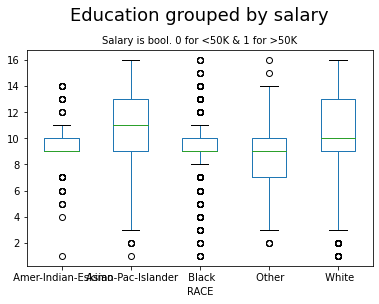

In [37]:
df.boxplot(by ='RACE', column =['EDUCATION-NUM'], grid = False)
plt.title("Salary is bool. 0 for <50K & 1 for >50K", loc="center", fontsize=10)
title_string="Education grouped by salary"
plt.suptitle(title_string, y=1.05, fontsize=18)
race=df["RACE"]
df.groupby(['RACE']).mean()

In [ ]:

df.boxplot(by ='RACE', column =['EDUCATION-NUM'], grid = False)
plt.title("Salary is bool. 0 for <50K & 1 for >50K", loc="center", fontsize=10)
title_string="Salary grouped by race"

plt.suptitle(title_string, y=1.05, fontsize=18)

In [ ]:


census_df = pd.read_csv("census_income_dataset.csv")
sns.barplot(x="AGE", y="HOURS-PER-WEEK", data=census_df)
sns.set(rc={'figure.figsize':(30,8.27)})
plt.xticks(rotation=45)

In [ ]:
df

In [ ]:
sex_df=df.groupby("HOURS-PER-WEEK")
sex_df.first()
sex_df.describe()

In [ ]:
M_salary=sex_df.get_group(" Male")